In [1]:
import pandas as pd

df = pd.read_csv("data/raw/energydata_complete.csv", parse_dates=["date"])

df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [2]:
print("ahape:", df.shape)
print("\ncolumns:", df.columns.tolist())
print("\ndata types:\n", df.dtypes)

ahape: (19735, 29)

columns: ['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

data types:
 date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out              

In [3]:
print("missing values:\n", df.isna().sum())

print("\nbasic stats:\n", df.describe(include="all"))

missing values:
 date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

basic stats:
                       date    Appliances        lights            T1  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     97.694958      3.801875     21.686571   
min    2016-01-11 17:00:00     10.000000      0.000000     16.790000   
25%    2016-02-14 23:15:00     50.000000      0.000000     20.760000   
50%    2016-03-20 05:30:00     60.000000      0.000000     21.600000   
75%    2016-04-23 11:45:00    

In [5]:
print("date range:", df['date'].min(), "to", df['date'].max())

df.corr(numeric_only=True)['Appliances'].sort_values(ascending=False)

date range: 2016-01-11 17:00:00 to 2016-05-27 18:00:00


Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

In [14]:
!pip install matplotlib seaborn


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


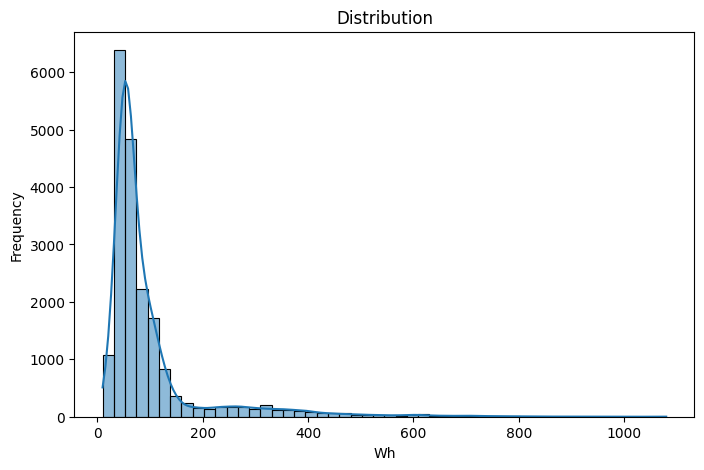

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['Appliances'], bins=50, kde=True)
plt.title('Distribution')
plt.xlabel('Wh')
plt.ylabel('Frequency')
plt.show()

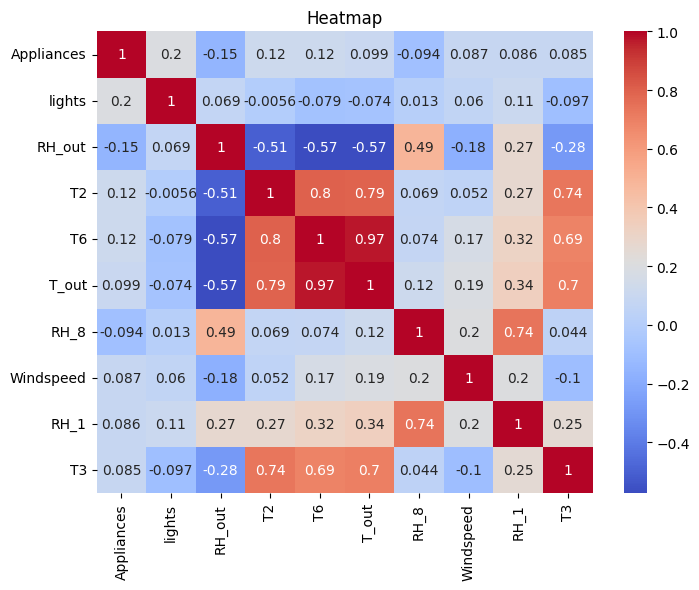

In [13]:
corr_matrix = df.corr(numeric_only=True)
top_corr = corr_matrix['Appliances'].abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.heatmap(df[top_corr.index].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()